In [5]:
import keras
from src.utilities import load_data_as_set_of_particles
from src.Models.MLP import MLP
from src.Models.PointNet import PointNet
from src import utilities

#### Loading the Data

In [6]:
# Creating the trainning, validation and test set
X_train, y_train = load_data_as_set_of_particles("../Data/HiggsTrainning.csv")
X_val, y_val = load_data_as_set_of_particles("../Data/HiggsValidation.csv")
X_test, y_test = load_data_as_set_of_particles("../Data/HiggsTest.csv")

#### Defining the Model

In [7]:
# Defining the MLP that will be used for all the particles
input_mlp = keras.layers.Input(shape=[7])
mlp = MLP(num_neurons=32)
mlp_model = keras.Model(inputs=input_mlp, outputs=mlp(input_mlp))

# creating the PointNet
input_point_net = keras.layers.Input(shape=[6, 7])
point_net = PointNet(mlp=mlp_model, mlp_output_dim=32)(input_point_net)
output_layer = keras.layers.Dense(2, activation='softmax')(point_net)

# final model
model = keras.Model(inputs=input_point_net, outputs=output_layer)
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 6, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ point_net_1 (PointNet)          │ (None, 64)             │         9,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,154 (35.76 KB)

 Trainable params: 8,962 (35.01 KB)

 Non-trainable params: 192 (768.00 B)

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 601us/step - accuracy: 0.5480 - loss: 0.6852 - val_accuracy: 0.5897 - val_loss: 0.6641
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - accuracy: 0.5833 - loss: 0.6688 - val_accuracy: 0.6049 - val_loss: 0.6582
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.5946 - loss: 0.6614 - val_accuracy: 0.6092 - val_loss: 0.6528
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.6049 - loss: 0.6564 - val_accuracy: 0.6119 - val_loss: 0.6520
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - accuracy: 0.6083 - loss: 0.6527 - val_accuracy: 0.6193 - val_loss: 0.6460
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step - accuracy: 0.6146 - loss: 0.6496 - val_accuracy: 0.6173 - val_loss: 0.6492
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - accuracy: 0.6134 - loss: 0.6502 - val_accuracy: 0.6272 - val_loss: 0.6422
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 

#### Quick checks

In [9]:
# perfoming the prediction
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 259us/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step
626/626 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step


In [10]:
print("Trainnig set:")
utilities.display_metrics(y_true=y_train, y_pred=y_train_pred)
print("Validation set:")
utilities.display_metrics(y_true=y_val, y_pred=y_val_pred)
print("Test set:")
utilities.display_metrics(y_true=y_test, y_pred=y_test_pred)

Trainnig set:
Recall: 0.7216
Precision: 0.6666
Confusion Matrix:
[[18014 12196]
 [ 9408 24382]]
Validation set:
Recall: 0.7065
Precision: 0.6516
Confusion Matrix:
[[4369 3189]
 [2478 5964]]
Test set:
Recall: 0.7051
Precision: 0.6521
Confusion Matrix:
[[5411 3988]
 [3126 7476]]


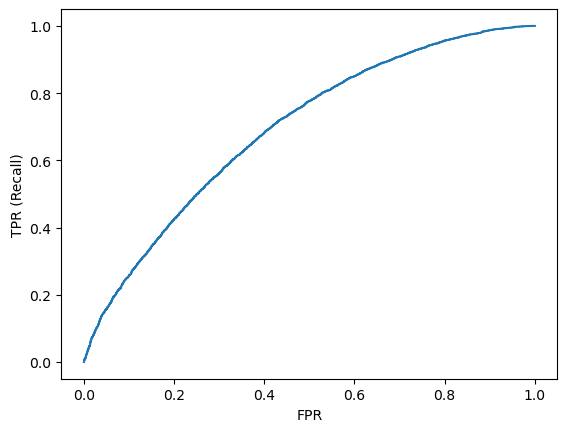

AUC: 0.6940


In [11]:
utilities.display_roc_curve(y_true=y_val, y_pred=y_val_pred)

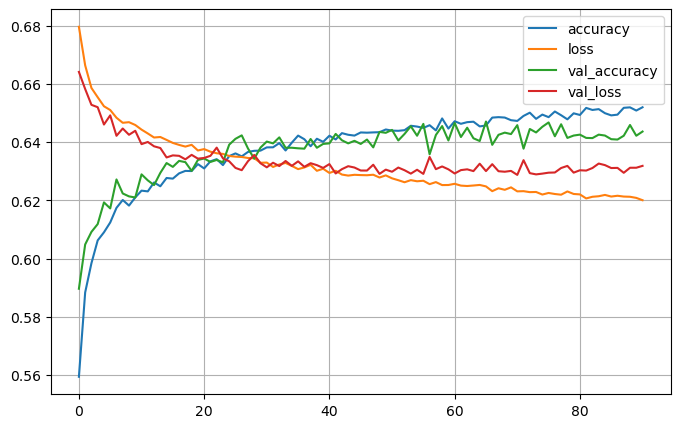

In [12]:
utilities.plot_hist_trainning(history)

In [13]:
utilities.save_model(model, history, "ModelFiles/PointNet")